# Pyber Data Analysis

In [8]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [9]:
# Combine the data into a single dataset
pyber = pd.merge(city_data, ride_data, how ="outer", on = "city")

# Display the data table for preview
pyber.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [10]:
#DF for city types
urban_df = pyber.loc[pyber["type"]=="Urban",:]
suburban_df = pyber.loc[pyber["type"]=="Suburban",:]
rural_df = pyber.loc[pyber["type"]=="Rural",:]

urban_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

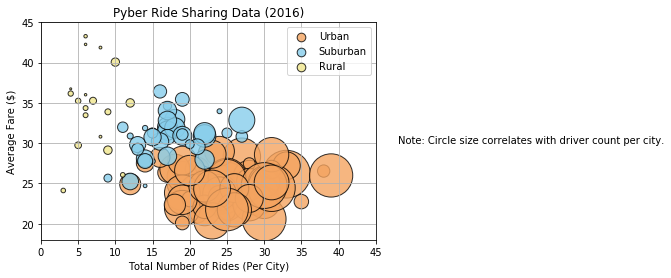

In [11]:
## Obtain the x and y coordinates for each of the three city types
urban_x = urban_df.groupby("city")["ride_id"].count()
urban_y = urban_df.groupby("city")["fare"].mean()
urban_drivercount = urban_df.groupby("city")["driver_count"].sum()

suburban_x = suburban_df.groupby("city")["ride_id"].count()
suburban_y = suburban_df.groupby("city")["fare"].mean()
suburban_drivercount = suburban_df.groupby("city")["driver_count"].sum()

rural_x = rural_df.groupby("city")["ride_id"].count()
rural_y = rural_df.groupby("city")["fare"].mean()
rural_drivercount = rural_df.groupby("city")["driver_count"].sum()

# Build the scatter plots for each city types
urban = plt.scatter(urban_x, urban_y, marker="o", c='sandybrown', s=urban_drivercount, edgecolors = 'black', alpha=0.8)
suburban = plt.scatter(suburban_x, suburban_y, marker="o", c='skyblue', s=suburban_drivercount, edgecolors = 'black', alpha=0.8)
rural = plt.scatter(rural_x, rural_y, marker="o", c='khaki', s=rural_drivercount, edgecolors = 'black', alpha=0.8)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.xlim(0, 45)
plt.ylim(18, 45)
plt.grid()

# Create a legend
legend = plt.legend((urban, suburban, rural), ("Urban", "Suburban", "Rural"),loc ='best')
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
text = "Note: Circle size correlates with driver count per city."
plt.text(48, 30, text)

# Save Figure
plt.savefig("Pyber Sharing Data.png")
plt.show()

## Total Fares by City Type

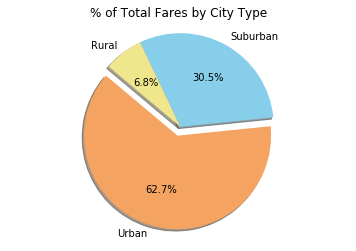

In [14]:
# Percent of total fares by city type
totfare = pyber["fare"].sum()

percent_urban = (urban_df["fare"].sum()/totfare)*100
percent_suburban = (suburban_df["fare"].sum()/totfare)*100
percent_rural = (rural_df["fare"].sum()/totfare)*100

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
value = [percent_urban, percent_suburban, percent_rural]
colors = ["sandybrown", "skyblue", "khaki"]
explode = [0.1,0,0]

plt.pie(value, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%",shadow=True, startangle = 140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Fare Distribution by City Type.png")
plt.show()

## Total Rides by City Type

In [6]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure